# 2.2 Integration with pandas DataFrames

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import signac

project = signac.init_project("projects/dataframe-example")

We create a project with some sample data.

In [2]:
funcs = {
    "abs": abs,
    "square": lambda x: x**2,
}

for x in range(-5, 6):
    job = project.open_job({"x": x})
    for name, func in funcs.items():
        job.document[name] = func(x)

Let's first create a basic DataFrame from our project:

In [3]:
df = project.to_dataframe()
df = df.sort_values("sp.x")
df

,sp.x,doc.abs,doc.square
3c5a15f6f26125f2902f38ff28a94072,-5,5,25
22749661e1ac649551a29953c93c9e92,-4,4,16
9e892a750ef4bf5ca73069c249088d40,-3,3,9
46049d7a2b36731d20af67766aadfeea,-2,2,4
c887a273c9a550e883f09187b0e28eb7,-1,1,1
eff8ca15e7ca8ae5c09f011f997b34df,0,0,0
27958648a9e57fcd66ae5e31ff3359e9,1,1,1
46c24d61c4220f8b62d2ae73d686ec18,2,2,4
d832cd5075866a4973a78377f49f58a5,3,3,9
9cdfeafe274b4f1762f0bf885ca055b7,4,4,16


Now we can select specific data subsets, for example jobs with $x=2$ or $x^2 > 10$:

In [4]:
df[(df["sp.x"] == 2) | (df["doc.square"] > 10)]

,sp.x,doc.abs,doc.square
3c5a15f6f26125f2902f38ff28a94072,-5,5,25
22749661e1ac649551a29953c93c9e92,-4,4,16
46c24d61c4220f8b62d2ae73d686ec18,2,2,4
9cdfeafe274b4f1762f0bf885ca055b7,4,4,16
7e1046a94a75679fe7ac259e068afdb5,5,5,25


We can plot a graph from our pretend data using matplotlib:

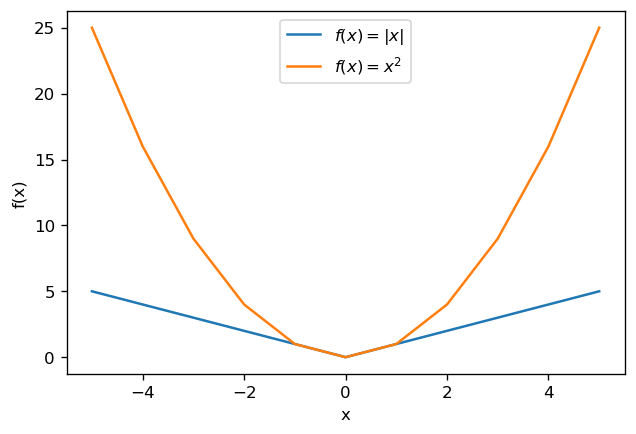

In [5]:
fig, ax = plt.subplots(dpi=120)
df.plot("sp.x", "doc.abs", ax=ax, label="$f(x)=|x|$")
df.plot("sp.x", "doc.square", ax=ax, label="$f(x)=x^2$")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.show()